In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from sklearn.neural_network import MLPClassifier
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, ConfusionMatrixDisplay

In [2]:
data_csv = "C:\\Users\\dvb07\\OneDrive\\classificator\\predconstr\\prep_phrases_db.csv"

df = pd.read_csv(data_csv)

In [3]:
df.head()

,phrase,host,prep,dependant,dependant_case,dependant_lemma,dependant_num,dependant_pos,host_lemma,host_pos,label,corpus
0,прицепились к весу багажа,прицепились,к,весу,datv,вес,sing,NOUN,прицепиться,VERB,тематив,taiga
1,к нему направился,направился,к,нему,datv,он,sing,NPRO,направиться,VERB,директив,taiga
2,к предстоящему отопительному сезону готовы,готовы,к,сезону,datv,сезон,sing,NOUN,готовый,ADJS,дестинатив,taiga
3,привлечения к уголовной ответственности,привлечения,к,ответственности,datv,ответственность,sing,NOUN,привлечение,NOUN,потенсив,taiga
4,принадлежащие ко дворцу службы,принадлежащие,к,дворцу,datv,дворец,sing,NOUN,принадлежащий,ADJF,квалификатив,taiga


In [4]:
prepositions = ('в', 'до', 'за', 'из', 'к', 'между', 'на', 'о', 'по', 'после', 'с', 'у')
syntaxemes = ('локатив', 'темпоратив', 'тематив', 'объект', 'директив')

In [5]:
df = df[(df.label.isin(syntaxemes)) & (df.prep.isin(prepositions))]
len(df)

6123

In [6]:
df = df[['phrase', 'label']]

In [7]:
df.head()

,phrase,label
0,прицепились к весу багажа,тематив
1,к нему направился,директив
5,выход к Чернорецкому переулку,директив
6,к которым направлен,директив
9,к нему потянулись,директив


In [8]:
sentences = df.phrase.values.tolist()
labels = df.label.values.tolist()

In [9]:
sentences[:5]

['прицепились к весу багажа',
 'к нему направился',
 'выход к Чернорецкому переулку',
 'к которым направлен',
 'к нему потянулись']

In [10]:
labels[:5]

['тематив', 'директив', 'директив', 'директив', 'директив']

---------------

In [11]:
model = SentenceTransformer("DeepPavlov/rubert-base-cased-sentence") 

No sentence-transformers model found with name C:\Users\dvb07/.cache\torch\sentence_transformers\DeepPavlov_rubert-base-cased-sentence. Creating a new one with MEAN pooling.


In [12]:
embeddings = []
for s in tqdm(sentences):
    embeddings.append(model.encode(s))

  0%|          | 0/6123 [00:00<?, ?it/s]

In [13]:
lab = LabelEncoder()
y = lab.fit_transform(labels)

In [14]:
trainX, testX, trainY, testY = train_test_split(embeddings, y, test_size = 0.2, random_state=0)

In [15]:
sc = StandardScaler()

scaler = sc.fit(trainX)

trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [16]:
mlp_clf = MLPClassifier(random_state=0)

In [19]:
mlp_clf.fit(trainX_scaled, trainY)
predicted = mlp_clf.predict(testX_scaled)

In [28]:
print(classification_report(testY, predicted, target_names=lab.classes_))

              precision    recall  f1-score   support

    директив       0.86      0.84      0.85       153
     локатив       0.87      0.88      0.88       398
      объект       0.47      0.45      0.46       207
     тематив       0.48      0.52      0.50       229
  темпоратив       0.91      0.87      0.89       238

    accuracy                           0.73      1225
   macro avg       0.72      0.71      0.71      1225
weighted avg       0.74      0.73      0.73      1225



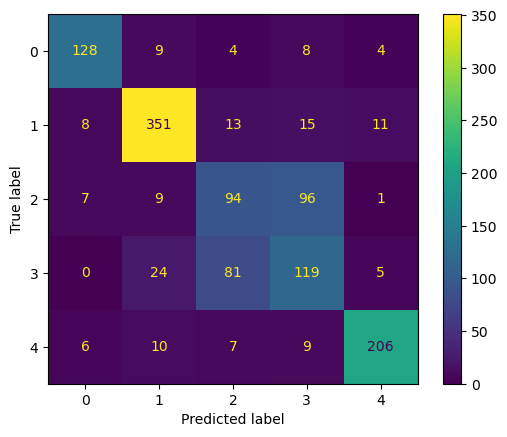

In [31]:
cm = confusion_matrix(testY, predicted, labels=mlp_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)
disp.plot()
plt.show()

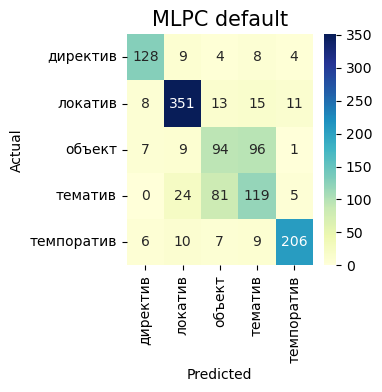

In [24]:
cnfmat = confusion_matrix(testY,predicted)
plt.subplots(figsize=(3,3))
sns.heatmap(cnfmat,annot=True,fmt="1d",cbar=True,xticklabels=lab.classes_,yticklabels=lab.classes_, cmap='YlGnBu')
plt.title('MLPC default',fontsize=15)
plt.xlabel("Predicted",fontsize=10)
plt.ylabel("Actual",fontsize=10)
plt.show()

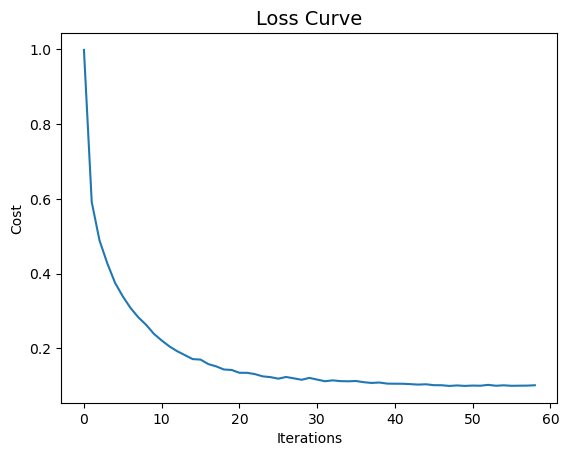

In [34]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

---------------

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=0)
clf.fit(trainX_scaled, trainY)
pred = clf.predict(testX_scaled)

In [26]:
print(classification_report(testY, pred, target_names=lab.classes_))

              precision    recall  f1-score   support

    директив       0.76      0.81      0.78       153
     локатив       0.86      0.88      0.87       398
      объект       0.48      0.39      0.43       207
     тематив       0.51      0.57      0.54       229
  темпоратив       0.88      0.87      0.87       238

    accuracy                           0.73      1225
   macro avg       0.70      0.70      0.70      1225
weighted avg       0.72      0.73      0.72      1225



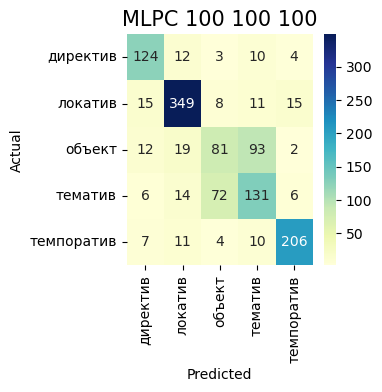

In [32]:
cnfmat = confusion_matrix(testY,pred)
plt.subplots(figsize=(3,3))
sns.heatmap(cnfmat,annot=True,fmt="1d",cbar=True,xticklabels=lab.classes_,yticklabels=lab.classes_, cmap='YlGnBu')
plt.title('MLPC 100 100 100',fontsize=15)
plt.xlabel("Predicted",fontsize=10)
plt.ylabel("Actual",fontsize=10)
plt.show()

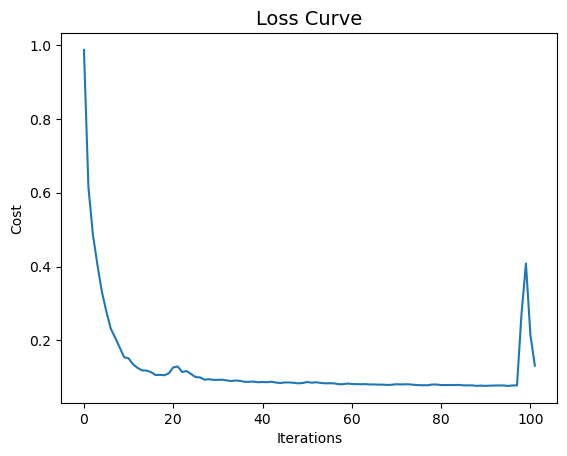

In [33]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()